In [2]:
import matplotlib
%matplotlib inline

import numpy as np, matplotlib as mpl
from Convenience import *

from time import time

In [3]:
scenario = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Progenitor' : ['Piro18/wind'],
}

scenario0 = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Progenitor' : ['Piro18/wind'],
}

scenario_tmp = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Progenitor' : ['Piro18/wind'],
}

scenario1 = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
#    'Inter' : ['Rodrigues18'],
    'Progenitor' : ['Piro18/wind'],
}



Here we produce a fake population that mimics observations expected for one of the considered models of IGM. We compute the Bayes factor for each of these models, providing a likelihood function on $\alpha$, the exponent of the $|B| \propto \rho^\alpha$ relation.

In [ ]:
telescope = 'parkes'
population = 'smd'

### produce fake data
FRBs = FakeFRBs( measures=['DM','RM'], telescope=telescope, population=population, **scenario )
    
### compute Bayes factor
Bs = []
for model in models_IGM[3:]:
    scenario_tmp['IGM'] = [model]
    Bs.append( BayesFactorCombined( DMs=FRBs['DM'], RMs=FRBs['RM'], scenario1=scenario_tmp, scenario2=scenario0, population=population, telescope=telescope ) )
Bs = np.array( Bs )
    
### Plot
alphas = np.arange(1,10)
plt.plot( alphas/3, Bs/Bs.max() )
plt.xlabel(r"$\alpha")
plt.ylabel(r"$\mathcal{B}")
plt.yscale('log')
plt.ylim(1e-5,2)


Here we compare the contribution of different regions

(0.0001, 10)

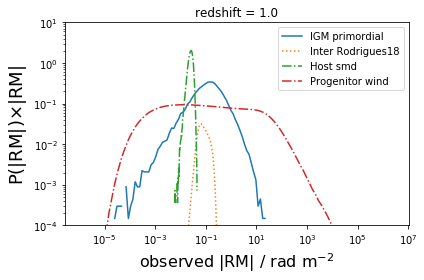

In [4]:
PlotContributions( redshift=1., measure='RM', **scenario0 )
plt.ylim(1e-4,10)

Here, we compute and show FRB measures expected to be observed by telescopes

this took 0.1 minutes


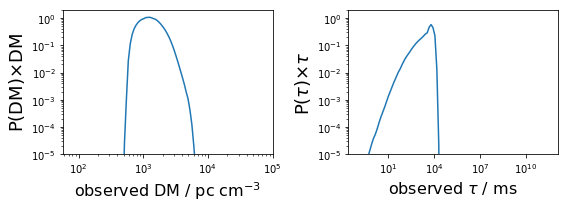

In [6]:
measures = ['DM', 'tau']
telescope = 'parkes'
population = 'smd'
fig, axs = plt.subplots( 1, len(measures), figsize=(4*len(measures),3) )

t0 = time()
for i_m, measure in enumerate( measures ):
    P, x = GetLikelihood_Telescope(measure=measure, telescope=telescope, population=population, **scenario )
    PlotLikelihood( x, P, measure=measure, ax=axs[i_m] )
for ax in axs:
    ax.set_ylim(1e-5,2)
plt.tight_layout()
print "this took %.1f minutes" % ( (time()-t0)/60 )

Here, we compute and show the expected measures of FRBs with increasing redshift

this took 0.1 minutes


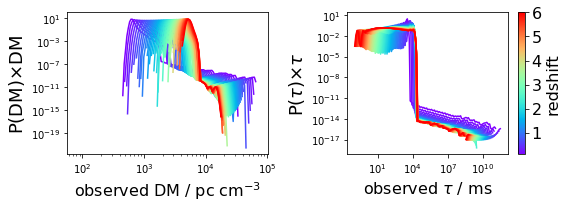

In [3]:
measures = ['DM', 'tau']

fig, axs = plt.subplots( 1, len(measures), figsize=(4*len(measures),3) )

t0 = time()
for i_m, measure in enumerate( measures ):
    for redshift, color in zip(redshift_bins, Rainbow( redshift_bins) ):
        P, x = GetLikelihood_Full(measure=measure, redshift=redshift, **scenario )
        PlotLikelihood( x, P, measure=measure, ax=axs[i_m], color=color )
Colorbar( redshift_bins, label='redshift' )
plt.tight_layout()
print "this took %.1f minutes" % ( (time()-t0)/60 )

Here we estimate the redshift based on DM and see how results can be improved by using $\tau$

N = 30
FRB190523 redshift(DM) = 0.25 +- 0.08 FRB190523 redshift(DM,tau) = 0.25 +- 0.08 

FRB181228 redshift(DM) = 0.15 +- 0.08 FRB181228 redshift(DM,tau) = 0.15 +- 0.08 

FRB181017 redshift(DM) = 0.50 +- 0.29 FRB181017 redshift(DM,tau) = 0.50 +- 0.29 

FRB181016 redshift(DM) = 1.59 +- 0.21 FRB181016 redshift(DM,tau) = 1.59 +- 0.21 

FRB180817 redshift(DM) = 0.54 +- 0.12 FRB180817 redshift(DM,tau) = 0.54 +- 0.12 

FRB180814 redshift(DM) = 0.50 +- 0.29 FRB180814 redshift(DM,tau) = 0.50 +- 0.29 

FRB180812 redshift(DM) = 0.30 +- 0.08 FRB180812 redshift(DM,tau) = 0.30 +- 0.08 

FRB180806 redshift(DM) = 0.21 +- 0.07 FRB180806 redshift(DM,tau) = 0.21 +- 0.07 

FRB180801 redshift(DM) = 0.09 +- 0.05 FRB180801 redshift(DM,tau) = 0.09 +- 0.05 

FRB180730 redshift(DM) = 0.34 +- 0.09 FRB180730 redshift(DM,tau) = 0.34 +- 0.09 

FRB180727 redshift(DM) = 0.09 +- 0.05 FRB180727 redshift(DM,tau) = 0.09 +- 0.05 

FRB180725 redshift(DM) = 0.18 +- 0.07 FRB180725 redshift(DM,tau) = 0.18 +- 0.07 

FRB180528

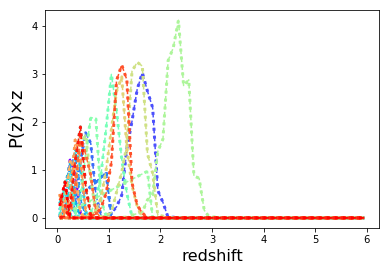

In [4]:
FRBs = GetFRBcat( tau=True )

P1s, z = LikelihoodRedshift( FRBs['DM'], scenario )
P2s, z = LikelihoodRedshift( FRBs['DM'], scenario, taus=FRBs['tau'] )
#P2s, z = LikelihoodRedshift( DMs, scenario, population='sfr', telescope='parkes' )
fig, ax = plt.subplots()
for P1, P2, id, z_host, color in zip( P1s, P2s, FRBs['ID'], FRBs['host_redshift'], Rainbow(np.linspace(0,1,len(FRBs))) ):
    PlotLikelihood( z, P1, measure='z', log=False, ax=ax, color=color, linestyle='--' )
    PlotLikelihood( z, P2, measure='z', log=False, ax=ax, color=color, linestyle=':', linewidth=3 )
    z_est, z_dev = Likelihood2Expectation( P1, z, log=False )
    print r"%s redshift(DM) = %.2f +- %.2f" % ( id, z_est, z_dev ), 
    z_est, z_dev = Likelihood2Expectation( P2, z, log=False )
    print r"%s redshift(DM,tau) = %.2f +- %.2f" % ( id, z_est, z_dev ) ,'\n'
plt.xlabel('redshift')
plt.show()